# Analysis of Healthcare Cost 

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_ff01f6f8ec354d1a95f15ed75d210eb5 = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_ff01f6f8ec354d1a95f15ed75d210eb5 = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_ff01f6f8ec354d1a95f15ed75d210eb5 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MqNJR9OhfgnmBkp527bFpTQ_kDvCE1e78mBuhRgRu8og',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_ff01f6f8ec354d1a95f15ed75d210eb5)

body = client_ff01f6f8ec354d1a95f15ed75d210eb5.get_object(Bucket='healthcaredataanalysisholmusk-donotdelete-pr-2ufppwmslovbhx',Key='bill_amount.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bill_amount_df = pd.read_csv(body)
bill_amount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bill_id  13600 non-null  int64  
 1   amount   13600 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 212.6 KB


In [2]:
body = client_ff01f6f8ec354d1a95f15ed75d210eb5.get_object(Bucket='healthcaredataanalysisholmusk-donotdelete-pr-2ufppwmslovbhx',Key='bill_id.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bill_id_df = pd.read_csv(body)
bill_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13600 entries, 0 to 13599
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   bill_id            13600 non-null  int64 
 1   patient_id         13600 non-null  object
 2   date_of_admission  13600 non-null  object
dtypes: int64(1), object(2)
memory usage: 318.9+ KB


In [3]:
body = client_ff01f6f8ec354d1a95f15ed75d210eb5.get_object(Bucket='healthcaredataanalysisholmusk-donotdelete-pr-2ufppwmslovbhx',Key='demographics.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

demographics_df = pd.read_csv(body)
demographics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_id       3000 non-null   object
 1   gender           3000 non-null   object
 2   race             3000 non-null   object
 3   resident_status  3000 non-null   object
 4   date_of_birth    3000 non-null   object
dtypes: object(5)
memory usage: 117.3+ KB


In [4]:
#conversion of demographic entries respectively 
demographics_df['gender'] = demographics_df['gender'].replace(['m','f'],['Male','Female'])
demographics_df['resident_status'] = demographics_df['resident_status'].replace(['Singapore citizen'],'Singaporean')
demographics_df['race'] = demographics_df['race'].replace(['chinese','India'],['Chinese','Indian'])

In [5]:
body = client_ff01f6f8ec354d1a95f15ed75d210eb5.get_object(Bucket='healthcaredataanalysisholmusk-donotdelete-pr-2ufppwmslovbhx',Key='clinical_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

clinical_data_df = pd.read_csv(body)
clinical_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  3400 non-null   object 
 1   date_of_admission   3400 non-null   object 
 2   date_of_discharge   3400 non-null   object 
 3   medical_history_1   3400 non-null   int64  
 4   medical_history_2   3167 non-null   float64
 5   medical_history_3   3400 non-null   object 
 6   medical_history_4   3400 non-null   int64  
 7   medical_history_5   3096 non-null   float64
 8   medical_history_6   3400 non-null   int64  
 9   medical_history_7   3400 non-null   int64  
 10  preop_medication_1  3400 non-null   int64  
 11  preop_medication_2  3400 non-null   int64  
 12  preop_medication_3  3400 non-null   int64  
 13  preop_medication_4  3400 non-null   int64  
 14  preop_medication_5  3400 non-null   int64  
 15  preop_medication_6  3400 non-null   int64  
 16  sympto

In [6]:
#rename id to patient id to ensure consistency for merge later on
clinical_data_df.rename(columns = {"id":"patient_id"},inplace = True)

In [7]:
#Merge the bill related files together using the bill_id and ensure all rows are included.
bill_df = pd.merge(bill_amount_df,bill_id_df, on='bill_id')
bill_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13600 entries, 0 to 13599
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_id            13600 non-null  int64  
 1   amount             13600 non-null  float64
 2   patient_id         13600 non-null  object 
 3   date_of_admission  13600 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 531.2+ KB


In [8]:
#Create a column for merge later 
bill_df['patient_admission_id'] = bill_df['patient_id'] + " " + bill_df['date_of_admission']

In [9]:
#The number of rows in this bill_df is significantly higher 
#We see each patient has more than one bill ID in the raw file and conduct a check
bill_df.value_counts('patient_id')

patient_id
4e46fddfa404b306809c350aecbf0f6a    16
d01386ff66ee5ecef47c5ef7980ff10a    12
a0214fcb0b1e3cf8d667e77a27f9840c    12
ea4f259bc46b6818f55b774abb7ac690    12
8239986dfdf8f4e0bb351ace4742ef95    12
                                    ..
59eead974b31958e01dd2df5f98e3467     4
5a5c675d8f573448d174d2529a2e3176     4
5a5f5742220310502a1640ef79b8f78d     4
5a8830c2abcb5dfaeb33fd3d8495ddc9     4
ffd9644f8daf1d28493a7cd700bb30f4     4
Length: 3000, dtype: int64

In [10]:
#Merge clinical_data with demographics on the patient_id
clinical_data_df = pd.merge(clinical_data_df,demographics_df, on='patient_id')

#Create column for merge later
clinical_data_df['patient_admission_id'] = clinical_data_df['patient_id'] + " " + clinical_data_df['date_of_admission']

clinical_data_df.head(10)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,lab_result_1,lab_result_2,lab_result_3,weight,height,gender,race,resident_status,date_of_birth,patient_admission_id
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,13.2,30.9,123.0,71.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2011-01-01
1,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,16.4,23.7,108.0,72.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2015-09-17
2,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,13.8,22.6,89.0,78.4,160.0,Female,Malay,Singaporean,1978-07-20,62bdca0b95d97e99e1c712048fb9fd09 2011-01-01
3,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,11.2,26.2,100.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2011-01-02
4,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,2014-03-26,1,0.0,1,0,0.0,1,0,...,18.6,28.4,88.0,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2014-03-20
5,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,13.3,28.4,76.0,64.4,152.0,Female,Chinese,PR,1967-12-06,e0397dd72caf4552c5babebd3d61736c 2011-01-02
6,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,12.0,27.8,87.0,55.6,160.0,Female,Others,PR,1982-07-18,94ade3cd5f66f4584902554dff170a29 2011-01-08
7,59e07adc2dbc5f70131f57d003610d74,2011-01-07,2011-01-17,0,NaN,No,0,NaN,0,0,...,15.8,31.0,75.0,78.8,169.0,Male,Chinese,Singaporean,1974-01-14,59e07adc2dbc5f70131f57d003610d74 2011-01-07
8,f5c4d97ebf32d49967fbf4f6c5fd52ec,2011-01-06,2011-01-17,0,0.0,0,0,0.0,0,1,...,12.1,23.0,83.0,81.8,164.0,Female,Malay,Singaporean,1934-04-24,f5c4d97ebf32d49967fbf4f6c5fd52ec 2011-01-06
9,1e788744568c21b390c5aa8c5dd61335,2011-01-07,2011-01-17,0,0.0,0,0,0.0,0,1,...,16.4,26.8,126.0,73.5,173.0,Male,Chinese,Singaporean,1961-12-23,1e788744568c21b390c5aa8c5dd61335 2011-01-07


In [11]:
import datetime as datetime

#Create Useful variables for analysis

#length of stay in hospital
clinical_data_df['date_of_discharge'] = pd.to_datetime(clinical_data_df['date_of_discharge'])
clinical_data_df['date_of_admission'] = pd.to_datetime(clinical_data_df['date_of_admission'])
clinical_data_df['length_of_stay'] = clinical_data_df['date_of_discharge'] - clinical_data_df['date_of_admission']

#BMI to account for height and weight instead of conventional normalization 
clinical_data_df['BMI'] = round(clinical_data_df['weight']/((clinical_data_df['height']/100)**2),1)

#Age based on the year between date of admission and DOB 
clinical_data_df['date_of_birth'] = pd.to_datetime(clinical_data_df['date_of_birth'])
clinical_data_df['age'] = (clinical_data_df['date_of_admission'] - clinical_data_df['date_of_birth']).astype('<m8[Y]')

clinical_data_df.head(10)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,weight,height,gender,race,resident_status,date_of_birth,patient_admission_id,length_of_stay,BMI,age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1.0,0,0,0.0,0,0,...,71.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2011-01-01,10 days,27.5,34.0
1,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0.0,0,0,0.0,0,1,...,72.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2015-09-17,13 days,27.9,38.0
2,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0.0,0,0,0.0,0,0,...,78.4,160.0,Female,Malay,Singaporean,1978-07-20,62bdca0b95d97e99e1c712048fb9fd09 2011-01-01,10 days,30.6,32.0
3,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0.0,0,0,0.0,0,0,...,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2011-01-02,11 days,31.6,43.0
4,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,2014-03-26,1,0.0,1,0,0.0,1,0,...,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2014-03-20,6 days,31.6,46.0
5,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1.0,No,0,0.0,1,1,...,64.4,152.0,Female,Chinese,PR,1967-12-06,e0397dd72caf4552c5babebd3d61736c 2011-01-02,12 days,27.9,43.0
6,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0.0,No,0,0.0,1,1,...,55.6,160.0,Female,Others,PR,1982-07-18,94ade3cd5f66f4584902554dff170a29 2011-01-08,8 days,21.7,28.0
7,59e07adc2dbc5f70131f57d003610d74,2011-01-07,2011-01-17,0,NaN,No,0,NaN,0,0,...,78.8,169.0,Male,Chinese,Singaporean,1974-01-14,59e07adc2dbc5f70131f57d003610d74 2011-01-07,10 days,27.6,36.0
8,f5c4d97ebf32d49967fbf4f6c5fd52ec,2011-01-06,2011-01-17,0,0.0,0,0,0.0,0,1,...,81.8,164.0,Female,Malay,Singaporean,1934-04-24,f5c4d97ebf32d49967fbf4f6c5fd52ec 2011-01-06,11 days,30.4,76.0
9,1e788744568c21b390c5aa8c5dd61335,2011-01-07,2011-01-17,0,0.0,0,0,0.0,0,1,...,73.5,173.0,Male,Chinese,Singaporean,1961-12-23,1e788744568c21b390c5aa8c5dd61335 2011-01-07,10 days,24.6,49.0


In [12]:
#Ensure all medical_history is converted to integers for consistency
clinical_data_df['medical_history_2'] = clinical_data_df['medical_history_2'].astype("Int64")
clinical_data_df['medical_history_5'] = clinical_data_df['medical_history_5'].astype("Int64")

clinical_data_df.head(10)

,patient_id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,...,weight,height,gender,race,resident_status,date_of_birth,patient_admission_id,length_of_stay,BMI,age
0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1,0,0,0,0,0,...,71.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2011-01-01,10 days,27.5,34.0
1,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0,0,0,0,0,1,...,72.3,161.0,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2015-09-17,13 days,27.9,38.0
2,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0,0,0,0,0,0,...,78.4,160.0,Female,Malay,Singaporean,1978-07-20,62bdca0b95d97e99e1c712048fb9fd09 2011-01-01,10 days,30.6,32.0
3,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0,0,0,0,0,0,...,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2011-01-02,11 days,31.6,43.0
4,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,2014-03-26,1,0,1,0,0,1,0,...,72.0,151.0,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2014-03-20,6 days,31.6,46.0
5,e0397dd72caf4552c5babebd3d61736c,2011-01-02,2011-01-14,0,1,No,0,0,1,1,...,64.4,152.0,Female,Chinese,PR,1967-12-06,e0397dd72caf4552c5babebd3d61736c 2011-01-02,12 days,27.9,43.0
6,94ade3cd5f66f4584902554dff170a29,2011-01-08,2011-01-16,0,0,No,0,0,1,1,...,55.6,160.0,Female,Others,PR,1982-07-18,94ade3cd5f66f4584902554dff170a29 2011-01-08,8 days,21.7,28.0
7,59e07adc2dbc5f70131f57d003610d74,2011-01-07,2011-01-17,0,<NA>,No,0,<NA>,0,0,...,78.8,169.0,Male,Chinese,Singaporean,1974-01-14,59e07adc2dbc5f70131f57d003610d74 2011-01-07,10 days,27.6,36.0
8,f5c4d97ebf32d49967fbf4f6c5fd52ec,2011-01-06,2011-01-17,0,0,0,0,0,0,1,...,81.8,164.0,Female,Malay,Singaporean,1934-04-24,f5c4d97ebf32d49967fbf4f6c5fd52ec 2011-01-06,11 days,30.4,76.0
9,1e788744568c21b390c5aa8c5dd61335,2011-01-07,2011-01-17,0,0,0,0,0,0,1,...,73.5,173.0,Male,Chinese,Singaporean,1961-12-23,1e788744568c21b390c5aa8c5dd61335 2011-01-07,10 days,24.6,49.0


In [13]:
#conversion of Yes and No entries to 1 and 0 respectively 
clinical_data_df['medical_history_3'] = clinical_data_df['medical_history_3'].replace(['Yes','No'],[1,0])
#conversion of medical_history_3 to integer from object
clinical_data_df["medical_history_3"] = clinical_data_df["medical_history_3"].astype(str).astype(int) 
clinical_data_df.dtypes

patient_id                       object
date_of_admission        datetime64[ns]
date_of_discharge        datetime64[ns]
medical_history_1                 int64
medical_history_2                 Int64
medical_history_3                 int64
medical_history_4                 int64
medical_history_5                 Int64
medical_history_6                 int64
medical_history_7                 int64
preop_medication_1                int64
preop_medication_2                int64
preop_medication_3                int64
preop_medication_4                int64
preop_medication_5                int64
preop_medication_6                int64
symptom_1                         int64
symptom_2                         int64
symptom_3                         int64
symptom_4                         int64
symptom_5                         int64
lab_result_1                    float64
lab_result_2                    float64
lab_result_3                    float64
weight                          float64


In [14]:
#create a new column to group bills from the same patient and admission date 
bill_df['patient_admission_id'] = bill_df['patient_id'] + " " + bill_df['date_of_admission']
print(f"number of unique patient admissions: {len(bill_df['patient_admission_id'].unique())}")
bill_df.head()

number of unique patient admissions: 3400


,bill_id,amount,patient_id,date_of_admission,patient_admission_id
0,40315104,1552.634830,96a76ec5bbcb1d1562c40b9b972e356d,2012-10-22,96a76ec5bbcb1d1562c40b9b972e356d 2012-10-22
1,2660045161,1032.011951,796de06efdad342d3f3a379dff0bd63c,2014-09-28,796de06efdad342d3f3a379dff0bd63c 2014-09-28
2,1148334643,6469.605351,1ce104904e9160cf3cfdb3c45b9ce4ff,2014-01-16,1ce104904e9160cf3cfdb3c45b9ce4ff 2014-01-16
3,3818426276,755.965425,afdfe7216d84e13708a19cbca288379a,2013-01-22,afdfe7216d84e13708a19cbca288379a 2013-01-22
4,9833541918,897.347816,b9a0c119dc07e07f88281964f3a4869f,2011-04-22,b9a0c119dc07e07f88281964f3a4869f 2011-04-22


We see the unique patient admission now tally with the number of entries in clinical_data_df. So we can proceed to create the same variable in the  clinical_data_df later on. Before that, we will merge the bill amount on the same patient_admission_id we have created. 

In [15]:
patient_df = pd.merge(clinical_data_df,bill_df, on='patient_admission_id')

In [16]:
patient_df2 = patient_df.groupby('patient_admission_id',as_index=False).sum([['amount']]) 
patient_df2.rename(columns = {"amount":"total_amount"},inplace = True)
patient_df2

,patient_admission_id,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,medical_history_7,preop_medication_1,preop_medication_2,...,symptom_5,lab_result_1,lab_result_2,lab_result_3,weight,height,BMI,age,bill_id,total_amount
0,00225710a878eff524a1d13be817e8e2 2014-04-10,0,0,0,0,0,0,4,0,0,...,0,53.6,111.6,384.0,267.6,620.0,111.2,124.0,26076361317,5190.566695
1,0029d90eb654699c18001c17efb0f129 2012-11-07,0,4,0,0,0,4,0,0,0,...,4,66.8,106.0,436.0,356.4,640.0,139.2,276.0,14912992947,22601.497872
2,0040333abd68527ecb53e1db9073f52e 2013-01-19,0,4,0,0,0,0,4,0,0,...,4,59.2,100.8,384.0,318.0,688.0,107.6,160.0,25839165421,17447.181635
3,00473b58e3dc8ae37b3cb34069705083 2014-02-10,4,0,0,0,0,0,0,0,0,...,0,59.6,114.8,488.0,324.4,640.0,126.8,148.0,18672163438,15285.883220
4,0078662d1d983dde68ea057c42d5b5cf 2012-04-28,0,4,0,0,0,4,0,4,0,...,4,56.8,108.8,356.0,298.8,692.0,100.0,276.0,27555446189,73477.869010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,ffa5a615a4cc5fb1ada0443edc1f5dd3 2011-04-24,0,4,0,0,0,0,4,0,0,...,0,65.2,109.6,344.0,277.2,648.0,105.6,136.0,28365460057,4676.066179
3396,ffac3c4b6838f42625e1dd00dd7c867b 2015-11-28,0,0,0,0,0,0,0,4,4,...,0,64.0,106.8,484.0,398.4,712.0,125.6,208.0,11999610855,14049.042774
3397,ffc19537fa6621512ef4f296d60896ce 2013-05-05,0,4,0,0,4,0,0,4,4,...,4,66.8,120.4,428.0,332.4,680.0,115.2,296.0,12784053233,30053.620971
3398,ffd67c2bcfb32508d2cf7b1e1193e2ed 2012-12-24,0,0,0,0,0,0,0,4,4,...,0,65.6,134.4,384.0,325.2,644.0,125.6,248.0,18859430162,28007.636468


In [17]:
patient_final_df = pd.merge(patient_df, patient_df2[['patient_admission_id','total_amount']], on='patient_admission_id')

In [18]:
#After obtaining the total amount, we add another column to account for amount per admission day.
#This accounts for length of stay contributing to healthcare cost.

patient_final_df['length_of_stay'] = patient_final_df['length_of_stay'].astype('timedelta64[D]').astype(int)

patient_final_df['average_amount_per_day'] = (patient_final_df['total_amount'])/(patient_final_df['length_of_stay'])



In [19]:
patient_final_df.drop(['amount','bill_id','patient_id_y','date_of_admission_y'],axis = 1,inplace = True)
patient_final_df.drop_duplicates(subset=None, keep='first',inplace = True)
patient_final_df.reset_index()

,index,patient_id_x,date_of_admission_x,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,...,gender,race,resident_status,date_of_birth,patient_admission_id,length_of_stay,BMI,age,total_amount,average_amount_per_day
0,0,1d21f2be18683991eb93d182d6b2d220,2011-01-01,2011-01-11,0,1,0,0,0,0,...,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2011-01-01,10,27.5,34.0,15405.418665,1540.541867
1,4,1d21f2be18683991eb93d182d6b2d220,2015-09-17,2015-09-30,0,0,0,0,0,0,...,Male,Indian,Singaporean,1976-12-19,1d21f2be18683991eb93d182d6b2d220 2015-09-17,13,27.9,38.0,19899.581704,1530.737054
2,8,62bdca0b95d97e99e1c712048fb9fd09,2011-01-01,2011-01-11,0,0,0,0,0,0,...,Female,Malay,Singaporean,1978-07-20,62bdca0b95d97e99e1c712048fb9fd09 2011-01-01,10,30.6,32.0,23303.000924,2330.300092
3,12,c85cf97bc6307ded0dd4fef8bad2fa09,2011-01-02,2011-01-13,0,0,0,0,0,0,...,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2011-01-02,11,31.6,43.0,16813.123088,1528.465735
4,16,c85cf97bc6307ded0dd4fef8bad2fa09,2014-03-20,2014-03-26,1,0,1,0,0,1,...,Female,Indian,Singaporean,1967-08-14,c85cf97bc6307ded0dd4fef8bad2fa09 2014-03-20,6,31.6,46.0,27268.686199,4544.781033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,13580,3f052a68d7c25d817a63aa1ba70f4dc2,2015-12-21,2016-01-06,0,0,0,0,0,0,...,Female,Chinese,Singaporean,1943-06-22,3f052a68d7c25d817a63aa1ba70f4dc2 2015-12-21,16,32.3,72.0,25040.612435,1565.038277
3396,13584,4f67a54ab205cc9e7e2b0a4ee08e4fba,2015-12-28,2016-01-07,0,0,0,0,0,1,...,Female,Chinese,Singaporean,1970-08-07,4f67a54ab205cc9e7e2b0a4ee08e4fba 2015-12-28,10,30.3,45.0,19356.767331,1935.676733
3397,13588,ac52a32f8ce8c46d82df2d72052ae5a9,2015-12-28,2016-01-08,0,0,0,0,0,1,...,Female,Chinese,Singaporean,1979-03-06,ac52a32f8ce8c46d82df2d72052ae5a9 2015-12-28,11,26.3,36.0,20141.411600,1831.037418
3398,13592,5189c62dfb8e6075b5c7fd4766671bd4,2015-12-26,2016-01-09,0,1,0,0,<NA>,0,...,Female,Chinese,Singaporean,1960-05-10,5189c62dfb8e6075b5c7fd4766671bd4 2015-12-26,14,35.9,55.0,10932.663154,780.904511


## Analysis of Healthcare Data

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeRegressor

In [21]:
patient_final_df.corr(method = 'spearman')['average_amount_per_day'].sort_values()

length_of_stay           -0.502739
medical_history_4        -0.032022
preop_medication_5       -0.020641
lab_result_1             -0.000444
preop_medication_4        0.006448
preop_medication_3        0.007345
lab_result_3              0.008264
medical_history_5         0.009808
lab_result_2              0.012545
medical_history_3         0.013273
preop_medication_1        0.015833
preop_medication_6        0.021258
medical_history_7         0.022825
medical_history_2         0.033655
height                    0.039682
preop_medication_2        0.058469
BMI                       0.121850
medical_history_6         0.124107
symptom_1                 0.127744
symptom_4                 0.139818
weight                    0.147330
symptom_2                 0.151694
symptom_3                 0.170614
medical_history_1         0.199396
age                       0.290332
symptom_5                 0.495891
total_amount              0.834842
average_amount_per_day    1.000000
Name: average_amount

In [22]:
patient_final_df.corr(method = 'spearman')['total_amount'].sort_values()

medical_history_4        -0.017019
lab_result_2             -0.008281
preop_medication_5       -0.005195
lab_result_1             -0.000338
lab_result_3              0.006482
length_of_stay            0.007457
preop_medication_4        0.009305
preop_medication_3        0.011944
preop_medication_1        0.015539
medical_history_3         0.022889
height                    0.027075
medical_history_2         0.027885
medical_history_5         0.027933
medical_history_7         0.032060
preop_medication_6        0.035173
preop_medication_2        0.039202
BMI                       0.140773
symptom_1                 0.142722
medical_history_6         0.154160
symptom_4                 0.154431
weight                    0.162556
symptom_2                 0.170303
symptom_3                 0.203784
medical_history_1         0.232571
age                       0.342727
symptom_5                 0.601128
average_amount_per_day    0.834842
total_amount              1.000000
Name: total_amount, 

<AxesSubplot:>

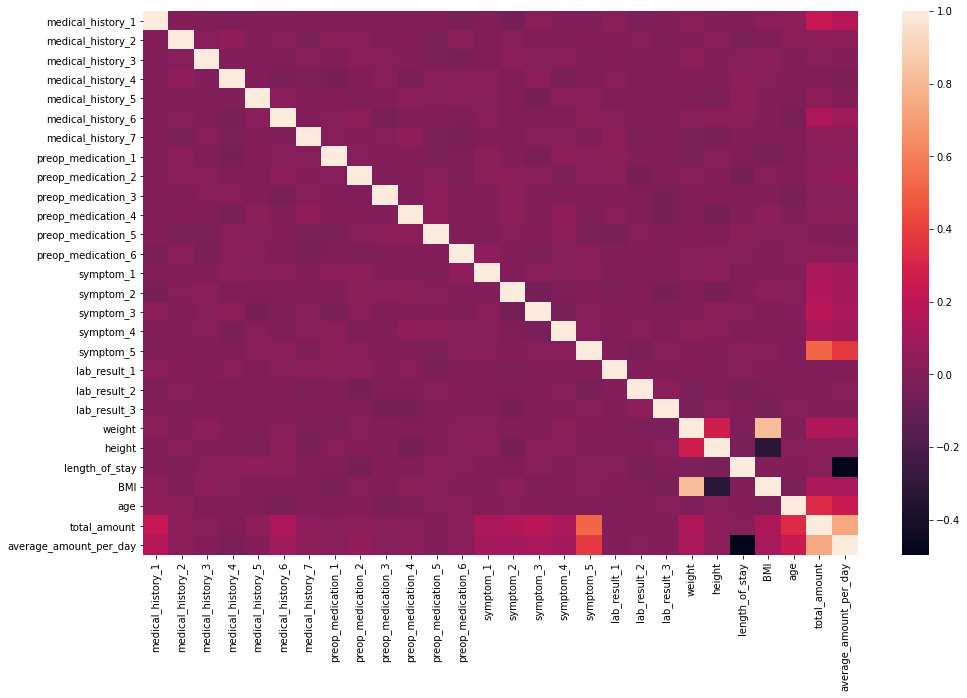

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(patient_final_df.corr())

### Resident Status on Healthcare Cost 

Text(0.5, 1.0, 'Resident Status vs Average Amount')

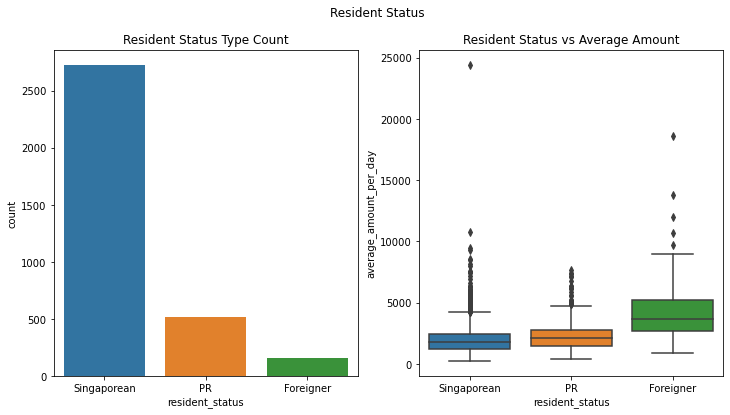

In [24]:
#we start of by examining the demographics of the patient on the bill amount 

fig, axes = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Resident Status')

# Count
sns.countplot(x = 'resident_status',data = patient_final_df, ax = axes[0])
axes[0].set_title('Resident Status Type Count')

# Type vs Amount 
sns.boxplot(x = 'resident_status' , y = 'average_amount_per_day',data = patient_final_df, ax=axes[1])
axes[1].set_title('Resident Status vs Average Amount')

### Gender on Healthcare Cost 

Text(0.5, 1.0, 'Gender vs Average Amount')

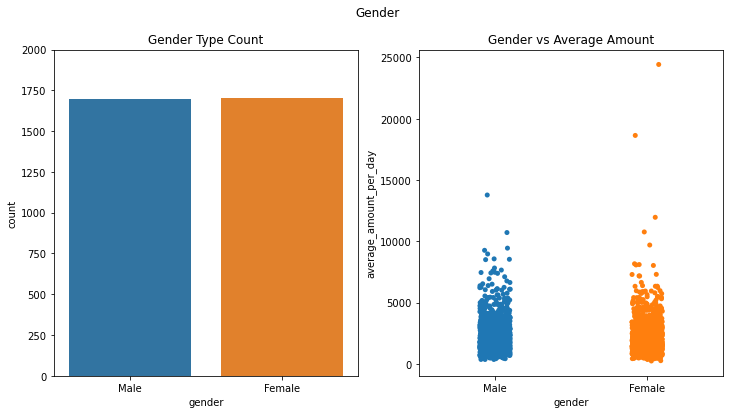

In [25]:
fig, axes = plt.subplots(1, 2,figsize=(12,6))
fig.suptitle('Gender')

# Count
sns.countplot(x = 'gender',data = patient_final_df, ax = axes[0])
axes[0].set_ylim(bottom=0, top=2000)
axes[0].set_title('Gender Type Count')

# Type vs Amount 
sns.stripplot(x = 'gender' , y = 'average_amount_per_day',data = patient_final_df, ax=axes[1])
axes[1].set_title('Gender vs Average Amount') 

### Race on Healthcare Cost 

Text(0.5, 1.0, 'Race vs Average Amount')

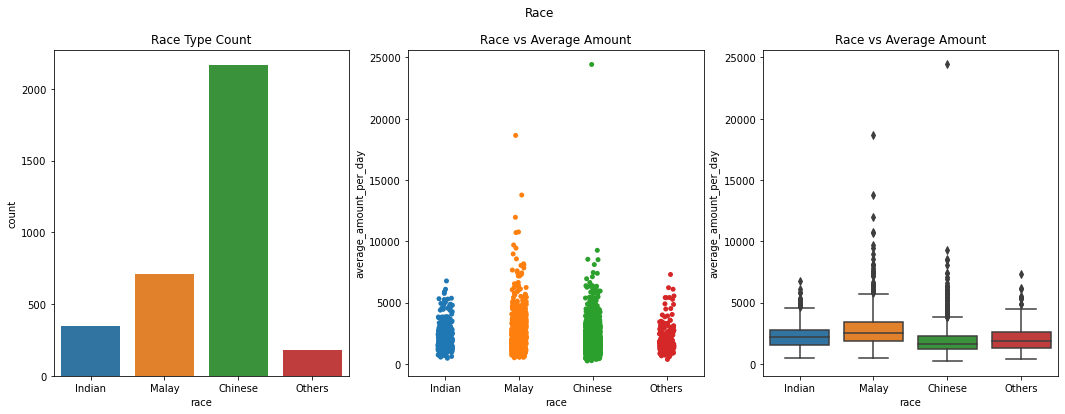

In [26]:
fig, axes = plt.subplots(1, 3,figsize=(18,6))
fig.suptitle('Race')

# Count
sns.countplot(x = 'race',data = patient_final_df, ax = axes[0])
axes[0].set_title('Race Type Count')

# Type vs Amount (scatter)
sns.stripplot(x = 'race' , y = 'average_amount_per_day',data = patient_final_df, ax=axes[1])
axes[1].set_title('Race vs Average Amount')

# Type vs Amount (box)
sns.boxplot(x = 'race' , y = 'average_amount_per_day',data = patient_final_df, ax=axes[2])
axes[2].set_title('Race vs Average Amount')

In [27]:
Chinese = patient_final_df[patient_final_df['race']=='Chinese']['average_amount_per_day']
Malay = patient_final_df[patient_final_df['race']=='Malay']['average_amount_per_day'].dropna()
Indian = patient_final_df[patient_final_df['race']=='Indian']['average_amount_per_day'].dropna()
Others = patient_final_df[patient_final_df['race']=='Others']['average_amount_per_day'].dropna()

race_df = pd.concat([Chinese,Malay,Indian,Others],axis = 1)
race_df.columns = ['Chinese','Malay','Indian','Others']

In [28]:
import scipy.stats as stats
from scipy.stats import anderson

#Determine if there is normal distribution in the races dataset 
for col in race_df.columns: 
    result = (anderson(race_df[col].dropna(), dist='norm'))
    print(f"A-D statistic: {result[0]}")
print(f"Critical values: {result[1]}")
print(f"Significance levels: {result[2]}")

A-D statistic: 78.17695864765028
A-D statistic: 25.505491466662875
A-D statistic: 5.488406324683751
A-D statistic: 5.38239740644471
Critical values: [0.564 0.642 0.771 0.899 1.069]
Significance levels: [15.  10.   5.   2.5  1. ]


In [29]:
#We conduct ANOVA to examine is the difference among races is statistically significant. 

#Use Box Cox to bring the distribution close to Gaussian distribution for ANOVA to be performed
for col in race_df.columns: 
    race_df[col],fitted_lambda = stats.boxcox(race_df[col])

F, p = stats.f_oneway(race_df['Chinese'].dropna(),race_df['Malay'].dropna(),race_df['Indian'].dropna(),race_df['Others'].dropna())
# Seeing if the overall model is significant
print('F-Statistic=%.3f, p=%.3f' % (F, p))

F-Statistic=0.129, p=0.943


As p > 0.05, we do not reject the null hypothesis. Therefore we cannot conclude there is a significant difference between the race dataset.

### Age on Healthcare Cost 

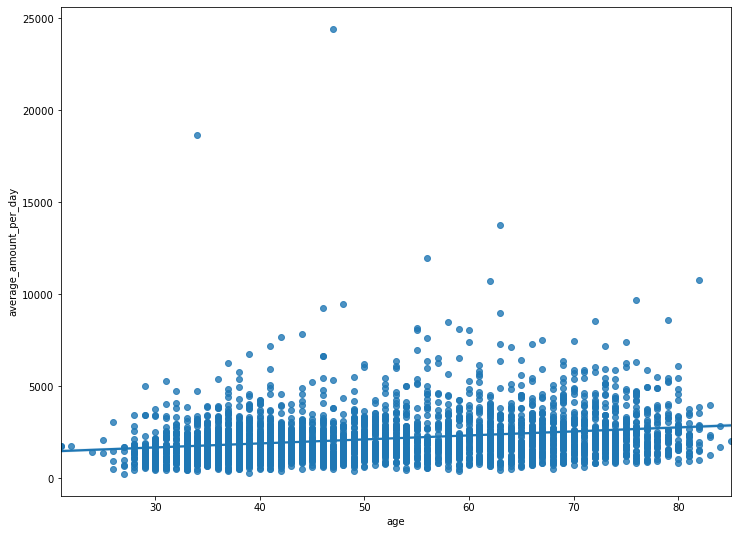

In [30]:
plt.figure(figsize = (12,9))
sns.regplot(x= "age", y= "average_amount_per_day", data = patient_final_df)
#set y limit to exclude outliers 
plt.set_ylim = [(0,10000)]

(-963.7778441737751, 10000.0)

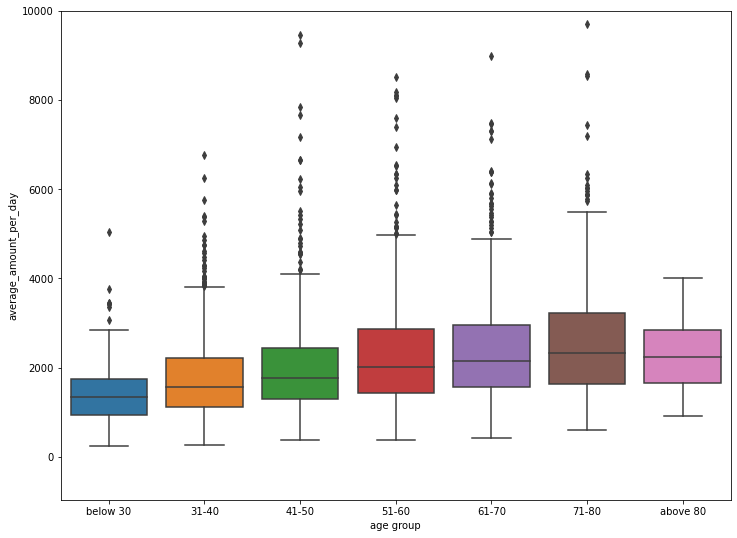

In [31]:
conditions = [
    (patient_final_df['age'] <= 30),
    (patient_final_df['age'] <= 40),
    (patient_final_df['age'] <= 50),
    (patient_final_df['age'] <= 60),
    (patient_final_df['age'] <= 70),
    (patient_final_df['age'] <= 80),
    (patient_final_df['age'] > 80)
    ]

# create a list of the values we want to assign for each condition
values = ['below 30', '31-40', '41-50', '51-60','61-70','71-80','above 80']

# create a new column and use np.select to assign values to it using our lists as arguments
patient_final_df['age group'] = np.select(conditions, values)

plt.figure(figsize = (12,9))
sns.boxplot(x = "age group", y= "average_amount_per_day", data = patient_final_df, order = values)
plt.ylim(top = 10000)

,average_amount_per_day,BMI
average_amount_per_day,1.000000,0.119626
BMI,0.119626,1.000000


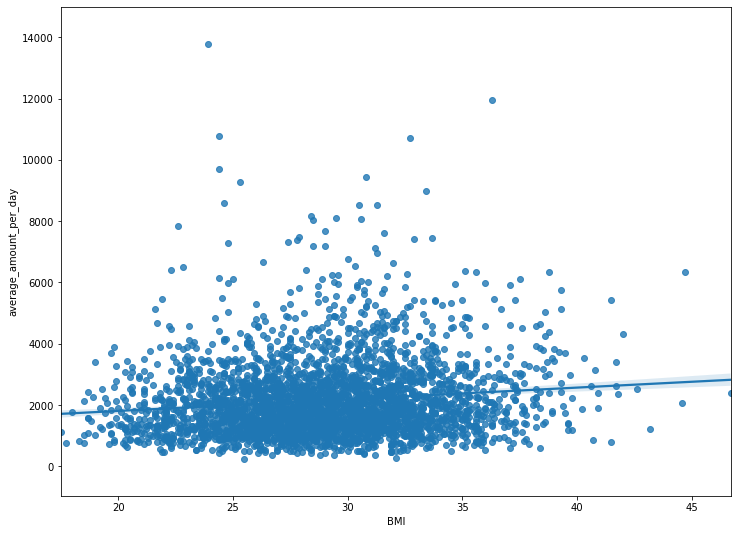

In [32]:
#Breakdown the effects from the clinical data 

#BMI on Healthcare Cost 
plt.figure(figsize=(12, 9))
sns.regplot(x= "BMI", y= "average_amount_per_day", data = patient_final_df)
plt.ylim(top = 15000)
patient_final_df[["average_amount_per_day","BMI"]].corr()

Healthy
healthy      2015.160635
unhealthy    2172.856147
Name: average_amount_per_day, dtype: float64

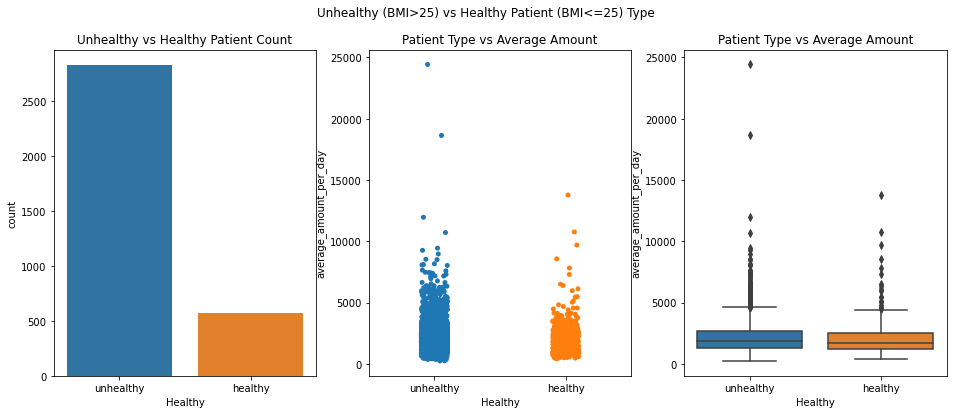

In [33]:
#BMI beyond 25 is considered unhealthy so we break these patients into 2 groups 
BMI_df = patient_final_df.copy()
BMI_df['Healthy'] = np.where(BMI_df['BMI']>=25,'unhealthy', 'healthy')
BMI_df

#Plot graph related to Healthy column
fig, axes = plt.subplots(1, 3,figsize=(16,6))
fig.suptitle('Unhealthy (BMI>25) vs Healthy Patient (BMI<=25) Type')

# Count
sns.countplot(x = 'Healthy',data = BMI_df, ax = axes[0])
axes[0].set_title('Unhealthy vs Healthy Patient Count')

# Type vs Amount (scatter)
sns.stripplot(x = 'Healthy' , y = 'average_amount_per_day',data = BMI_df, ax=axes[1])
axes[1].set_title('Patient Type vs Average Amount')

# Type vs Amount (box)
sns.boxplot(x = 'Healthy' , y = 'average_amount_per_day',data = BMI_df, ax=axes[2])
axes[2].set_title('Patient Type vs Average Amount')

BMI_df.groupby('Healthy')['average_amount_per_day'].mean()

### Lab Results on Average Amount 

(0.0, 15000.0)

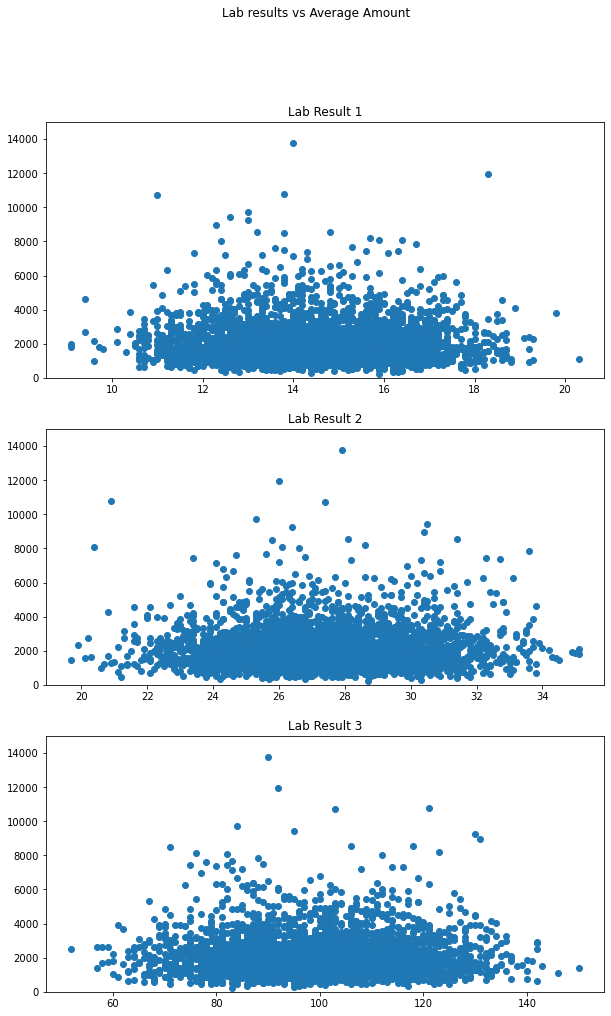

In [34]:
#lab_result vs average amount per day 
lab_results_df = patient_final_df[['lab_result_1', 'lab_result_2','lab_result_3','average_amount_per_day']]
lab_results_df.corr()

#Plot graph for Lab Results 
fig, axes = plt.subplots(3, 1,figsize=(10,16))
fig.suptitle('Lab results vs Average Amount')

axes[0].scatter(x='lab_result_1',y='average_amount_per_day', data=lab_results_df)
axes[0].set_title('Lab Result 1')
axes[0].set_ylim([0, 15000])

axes[1].scatter(x='lab_result_2',y='average_amount_per_day', data=lab_results_df)
axes[1].set_title('Lab Result 2')
axes[1].set_ylim([0, 15000])

axes[2].scatter(x='lab_result_3',y='average_amount_per_day', data=lab_results_df)
axes[2].set_title('Lab Result 3')
axes[2].set_ylim([0, 15000])


The tables shows there is weak or no relationship between the Lab results and Average Amount spent, nor is there relationship between the Lab results. 

### Preopt Medication on Healthcare Cost 

,0,1
Pre-opt med,,
preop_medication_1,2126.535141,2165.908920
preop_medication_2,2070.954444,2198.527405
preop_medication_3,2112.474337,2153.769219
preop_medication_4,2120.234998,2170.188775
preop_medication_5,2186.599372,2137.524703
preop_medication_6,2114.255757,2157.416701


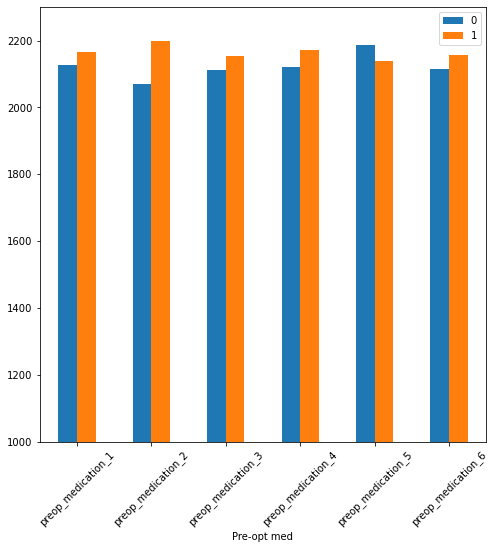

In [35]:
preop_med = ['preop_medication_1', 'preop_medication_2','preop_medication_3','preop_medication_4', 'preop_medication_5','preop_medication_6']
    
pre_med_0 = []
pre_med_1 = []

for i in preop_med:  
    preop_medication_df = patient_final_df[[i,'average_amount_per_day']]
    x = preop_medication_df.groupby(i)['average_amount_per_day'].mean().values
    pre_med_0.append(x[0])
    pre_med_1.append(x[1])

dict = {'Pre-opt med': preop_med, '0': pre_med_0, '1': pre_med_1} 

df = pd.DataFrame(dict).set_index(['Pre-opt med'])
df.plot(kind = 'bar',figsize = (8,8))
plt.xticks(rotation = 45)
plt.ylim([1000,2300])

df

In [36]:
preop_medication_df = patient_final_df[['preop_medication_1', 'preop_medication_2','preop_medication_3', 
                    'preop_medication_4', 'preop_medication_5','preop_medication_6','average_amount_per_day']]

preop_medication_df = preop_medication_df.astype(str)

preop_medication_df['combination'] = preop_medication_df[['preop_medication_1', 'preop_medication_2','preop_medication_3', 
                    'preop_medication_4', 'preop_medication_5','preop_medication_6']].agg('-'.join, axis=1)

preop_medication_df['average_amount_per_day'] = preop_medication_df['average_amount_per_day'].astype(float)

preop_medication_df2 = preop_medication_df.groupby('combination').mean().sort_values(by = 'average_amount_per_day')

(0.0, 15000.0)

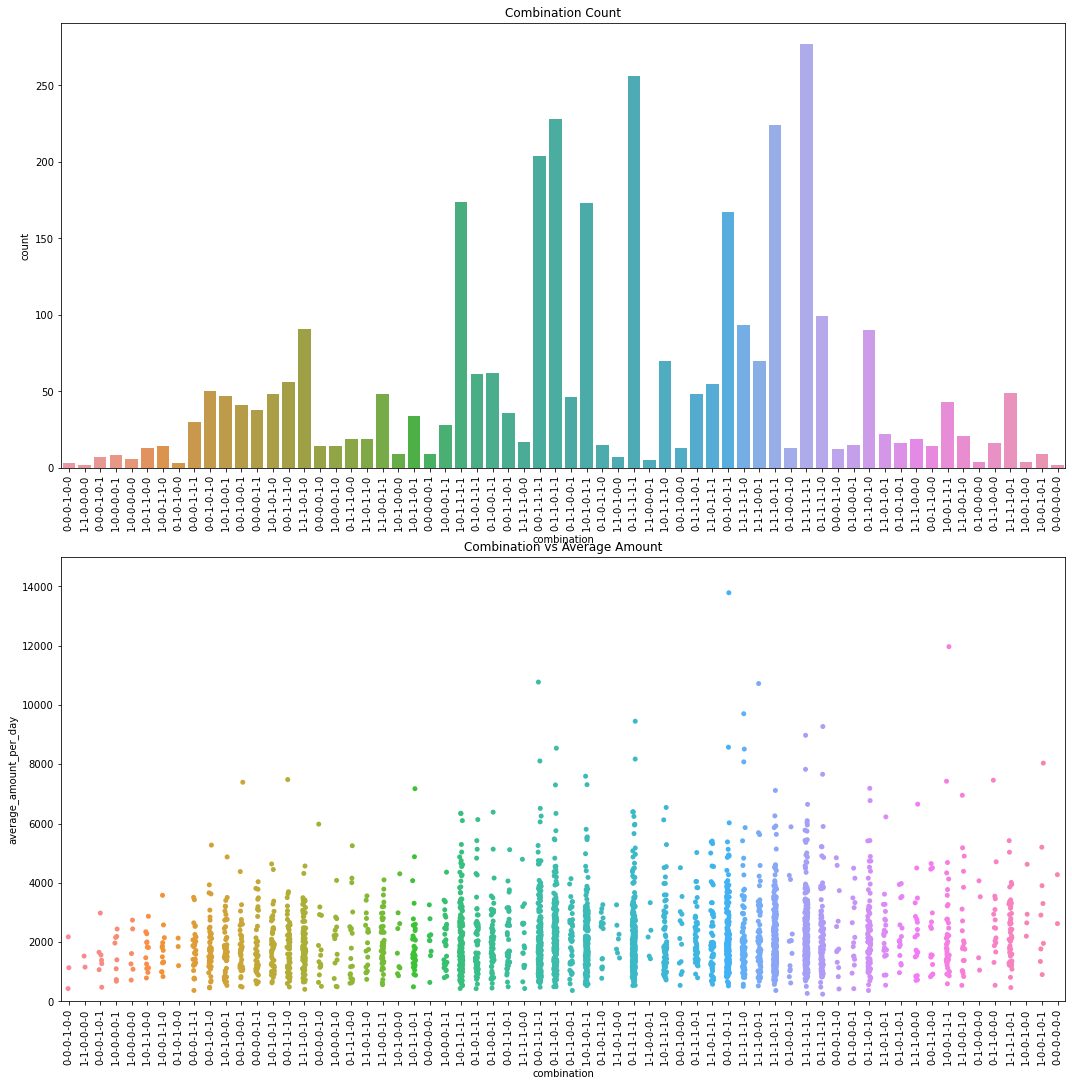

In [37]:
fig, axes = plt.subplots(2, 1,figsize=(18,18))

# Count
sns.countplot(x = 'combination',order = preop_medication_df2.index,data = preop_medication_df, ax = axes[0])
axes[0].set_title('Combination Count')
axes[0].tick_params(axis='x', rotation=90)

# Type vs Amount (scatter)
sns.stripplot(x = 'combination' , y = 'average_amount_per_day',order = preop_medication_df2.index, data = preop_medication_df, ax=axes[1])
axes[1].set_title('Combination vs Average Amount')
axes[1].tick_params(axis='x', rotation=90)
axes[1].set_ylim(0, 15000)

#preop_medication_df['combination'].value_counts().index

### Symptoms on Healthcare Cost 

In [38]:
symptom_df = patient_final_df[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5','average_amount_per_day']]

symptom_df = symptom_df.astype(str)

symptom_df['combination'] = symptom_df[['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5']].agg('-'.join, axis=1)

symptom_df['average_amount_per_day'] = symptom_df['average_amount_per_day'].astype(float)

symptom_df2 = symptom_df.groupby('combination').mean().sort_values(by = 'average_amount_per_day')

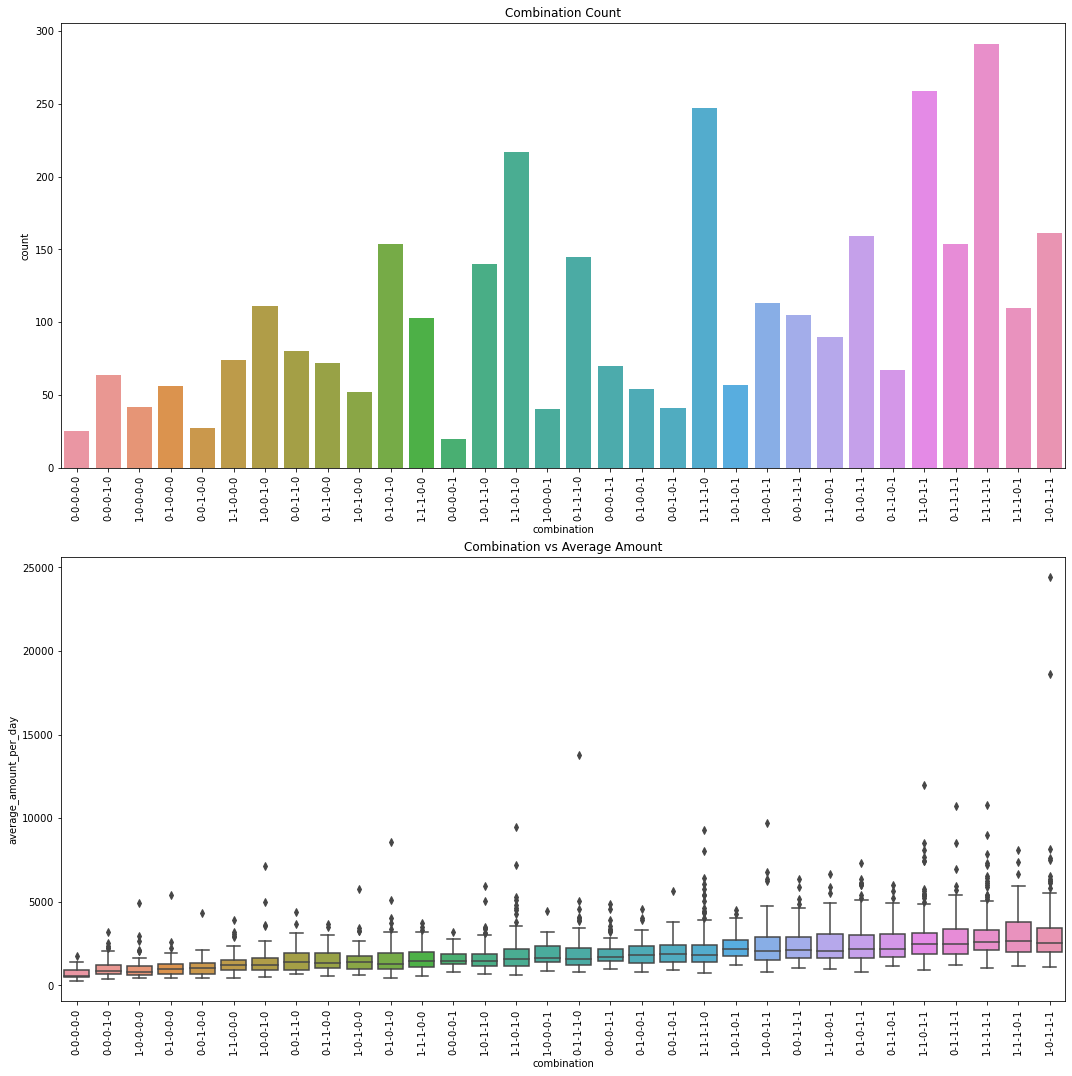

In [39]:
fig, axes = plt.subplots(2, 1,figsize=(18,18))

# Count
sns.countplot(x = 'combination',order = symptom_df2.index,data = symptom_df, ax = axes[0])
axes[0].set_title('Combination Count')
axes[0].tick_params(axis='x', rotation=90)

# Type vs Amount (scatter)
sns.boxplot(x = 'combination' , y = 'average_amount_per_day',order = symptom_df2.index, data = symptom_df, ax=axes[1])
axes[1].set_title('Combination vs Average Amount')
axes[1].tick_params(axis='x', rotation=90)

### Medical History on Healthcare Cost 

In [40]:
#Filter patient file by dropping null values to be used for training data
filtered_patient_final_df = patient_final_df.dropna()

In [41]:
#Separate out the entries where medical_history_2 is null 
med2_test = patient_final_df[patient_final_df['medical_history_2'].isnull()]

#Separate out the entries where ONLY medical_history_5 is null 
med5_test = patient_final_df[patient_final_df['medical_history_5'].isnull()]
med5_test =  med5_test.dropna(subset=['medical_history_2'])

#Separate out the entries where ONLY medical_history_2 is null 
med2_test =  med2_test.dropna(subset=['medical_history_5'])

#Separate out the entries where medical_history_2, 5 is null 
med2n5_test = med5_test[med5_test['medical_history_2'].isnull()]

#Filter patient file by dropping entries where medical_history_2, 5 is null
filtered_med_patient_final_df = patient_final_df.drop(med2n5_test.index)

In [42]:
med2_test_filtered = med2_test[['medical_history_1', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'length_of_stay', 'BMI', 'age','total_amount']]

med2_test_filtered = pd.concat([med2_test_filtered, pd.get_dummies(med2_test['race']),pd.get_dummies(med2_test['gender']),
                pd.get_dummies(med2_test['resident_status'])], axis=1)

In [43]:
#Create Decision Tree Model to predict null values in medical_history_2 

X2 = filtered_patient_final_df[['medical_history_1', 'medical_history_3',
       'medical_history_4', 'medical_history_5', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'length_of_stay', 'BMI', 'age','total_amount']]

X2 = pd.concat([X2, pd.get_dummies(filtered_patient_final_df['race']),pd.get_dummies(filtered_patient_final_df['gender']),
                pd.get_dummies(filtered_patient_final_df['resident_status'])], axis=1)

y = filtered_patient_final_df['medical_history_2'].astype(int).values

X2 = preprocessing.StandardScaler().fit(X2).transform(X2)

x_train, x_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2318, 33) (2318,)
Test set: (580, 33) (580,)


In [44]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))

For depth = 1  the accuracy score is 0.6672413793103448 
For depth = 2  the accuracy score is 0.6672413793103448 
For depth = 3  the accuracy score is 0.6672413793103448 
For depth = 4  the accuracy score is 0.6672413793103448 
For depth = 5  the accuracy score is 0.6689655172413793 
For depth = 6  the accuracy score is 0.6655172413793103 
For depth = 7  the accuracy score is 0.6620689655172414 
For depth = 8  the accuracy score is 0.6689655172413793 
For depth = 9  the accuracy score is 0.6655172413793103 


The best value of depth is d = 5 

In [45]:
#Creating the best decision tree with depth = 5 
best_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5,class_weight ='balanced').fit(x_train, y_train)

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_dt_model.predict(x_train)))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_dt_model.predict(x_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, best_dt_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_dt_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.32558139534883723
Test set Accuracy (Jaccard):  0.3327205882352941
Train set Accuracy (F1):  0.2831913186671266
Test set Accuracy (F1):  0.276589774078478


In [46]:
#Create a Logistic Regression Model for comparison 
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.6407736812857414
When Solver is saga, logloss is : 0.6407733630460531
When Solver is liblinear, logloss is : 0.6397369433008937
When Solver is newton-cg, logloss is : 0.6407736459457366
When Solver is sag, logloss is : 0.6407727164841711


In [47]:
best_lr_model = LogisticRegression(C = 0.01, solver = 'lbfgs', class_weight = 'balanced').fit(x_train, y_train)

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_lr_model.predict(x_train),pos_label = 1))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_lr_model.predict(x_test), pos_label = 1))

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.27851644506648005
Test set Accuracy (Jaccard):  0.2568306010928962
Train set Accuracy (F1):  0.5710925148911424
Test set Accuracy (F1):  0.5439674448490041


In [48]:
#Create svm model for comparison
from sklearn import svm 
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For kernel: {}, the f1 score is: {}".format(k,f1_score(y_test,svm_yhat, average='weighted')))

For kernel: linear, the f1 score is: 0.5340691081553329
For kernel: poly, the f1 score is: 0.5605708440110191
For kernel: rbf, the f1 score is: 0.5340691081553329
For kernel: sigmoid, the f1 score is: 0.5615064600240236


In [49]:
best_svm = svm.SVC(kernel='sigmoid', class_weight = 'balanced').fit(x_train,y_train)
best_svm

SVC(class_weight='balanced', kernel='sigmoid')

In [50]:
print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_svm.predict(x_train)))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_svm.predict(x_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, best_svm.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_svm.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.18036809815950922
Test set Accuracy (Jaccard):  0.2724867724867725
Train set Accuracy (F1):  0.4440957340504556
Test set Accuracy (F1):  0.5395157153066857


In [51]:
med2_test_filtered['medical_history_2'] = best_lr_model.predict(med2_test_filtered)

In [52]:
med2_test = med2_test.merge(med2_test_filtered['medical_history_2'], left_index=True, right_index=True)

In [53]:
#Rename the columns 
med2_test.drop(columns = ['medical_history_2_x'])
med2_test.rename(columns = {"medical_history_2_y":"medical_history_2"},inplace = True) 

In [54]:
#Repeat the process for medical_history_5
med5_test_filtered = med5_test[['medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'length_of_stay', 'BMI', 'age','total_amount']]

med5_test_filtered = pd.concat([med5_test_filtered, pd.get_dummies(med5_test['race']),pd.get_dummies(med5_test['gender']),
                pd.get_dummies(med5_test['resident_status'])], axis=1)

In [55]:
#Create Logistic Model to predict null values in medical_history_5

X3 = filtered_patient_final_df[['medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'length_of_stay', 'BMI', 'age','total_amount']]

X3 = pd.concat([X3, pd.get_dummies(filtered_patient_final_df['race']),pd.get_dummies(filtered_patient_final_df['gender']),
                pd.get_dummies(filtered_patient_final_df['resident_status'])], axis=1)

y = filtered_patient_final_df['medical_history_5'].astype(int).values

X3 = preprocessing.StandardScaler().fit(X3).transform(X3)

x_train, x_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2318, 33) (2318,)
Test set: (580, 33) (580,)


In [56]:
for k in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = k).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('When Solver is {}, logloss is : {}'.format(k, log_loss(y_test, y_prob)))

When Solver is lbfgs, logloss is : 0.2531168652171455
When Solver is saga, logloss is : 0.25311680016015736
When Solver is liblinear, logloss is : 0.2757372267096388
When Solver is newton-cg, logloss is : 0.2531168640757447
When Solver is sag, logloss is : 0.2531168269880401


In [57]:
#Creating the log regression model 
best_lr_model = LogisticRegression(C = 0.01, solver = 'liblinear', class_weight = 'balanced').fit(x_train, y_train)

print("Train set Accuracy (Jaccard): ", jaccard_score(y_train, best_lr_model.predict(x_train)))
print("Test set Accuracy (Jaccard): ", jaccard_score(y_test, best_lr_model.predict(x_test)))

print("Train set Accuracy (F1): ", f1_score(y_train, best_lr_model.predict(x_train), average='weighted'))
print("Test set Accuracy (F1): ", f1_score(y_test, best_lr_model.predict(x_test), average='weighted'))

Train set Accuracy (Jaccard):  0.09167446211412535
Test set Accuracy (Jaccard):  0.0759493670886076
Train set Accuracy (F1):  0.6848391160438492
Test set Accuracy (F1):  0.7154707339213071


In [58]:
med5_test_filtered['medical_history_5'] = best_lr_model.predict(med5_test_filtered)

In [59]:
med5_test = med5_test.merge(med5_test_filtered['medical_history_5'], left_index=True, right_index=True)
#Rename the columns 
med5_test.rename(columns = {"medical_history_5_y":"medical_history_5"},inplace = True) 
med5_test.drop(columns = ['medical_history_5_x'],inplace = True)

In [60]:
filtered_patient_final_df = filtered_patient_final_df.append([med5_test,med2_test])

In [70]:
from sklearn.linear_model import LinearRegression

X = filtered_patient_final_df[['medical_history_1', 'medical_history_2',
       'medical_history_3', 'medical_history_4', 'medical_history_5','medical_history_6',
       'medical_history_7', 'preop_medication_1', 'preop_medication_2',
       'preop_medication_3', 'preop_medication_4', 'preop_medication_5',
       'preop_medication_6', 'symptom_1', 'symptom_2', 'symptom_3',
       'symptom_4', 'symptom_5', 'lab_result_1', 'lab_result_2',
       'lab_result_3', 'BMI', 'age']]

X = pd.concat([X, pd.get_dummies(filtered_patient_final_df['race']),pd.get_dummies(filtered_patient_final_df['gender']),
                pd.get_dummies(filtered_patient_final_df['resident_status'])], axis=1)

y = filtered_patient_final_df['average_amount_per_day'].astype(int).values

X1 = X.columns

X = preprocessing.StandardScaler().fit(X).transform(X)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2692, 32) (2692,)
Test set: (673, 32) (673,)


In [72]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

coeff_df = pd.DataFrame(dtr.feature_importances_, X1, columns=['feature importance'])
coeff_df = coeff_df.sort_values(by=['feature importance'])
coeff_df['Type'] = coeff_df.index

Text(0.5, 1.0, 'Feature Importance vs Type')

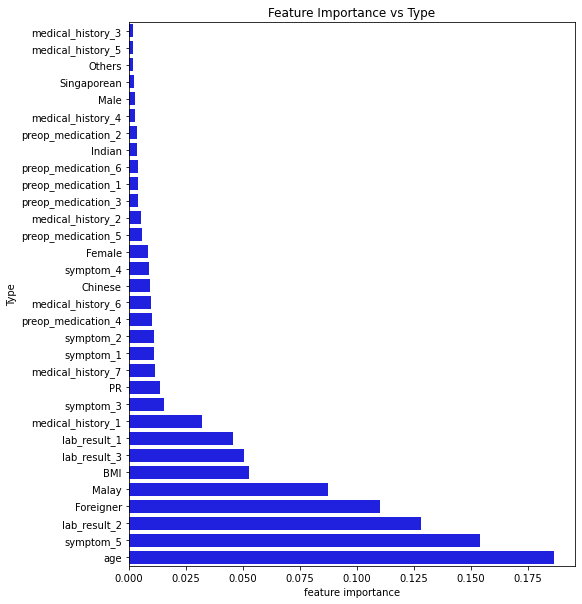

In [73]:
plt.figure(figsize=(8, 10))
sns.barplot(x = 'feature importance', y = 'Type' , data = coeff_df, color = 'blue')
plt.title('Feature Importance vs Type')

,0,1
medical_history,,
medical_history_1,2046.273511,2649.602398
medical_history_2,2127.921998,2186.835542
medical_history_3,2145.465762,2168.767653
medical_history_4,2155.810534,2018.146041
medical_history_5,2154.354026,2113.261654
medical_history_6,2078.661540,2354.763626
medical_history_7,2125.197825,2217.072657


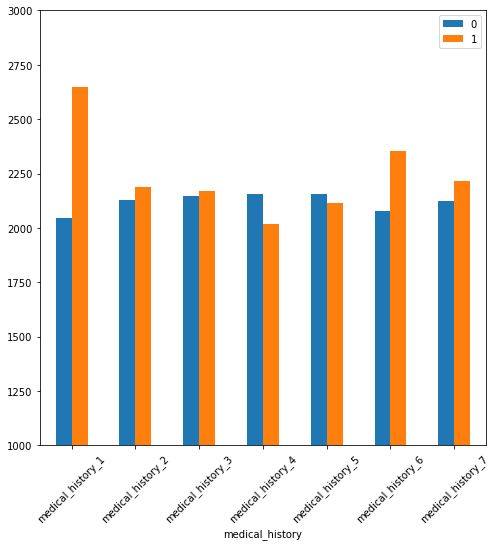

In [65]:
medical_history = ['medical_history_1', 'medical_history_2','medical_history_3',
              'medical_history_4', 'medical_history_5','medical_history_6','medical_history_7']
med_0 = []
med_1 = []

for x in medical_history: 
    medical_history_df = filtered_patient_final_df[[x,'average_amount_per_day']]
    g = medical_history_df.groupby(x)['average_amount_per_day'].mean().values
    med_0.append(g[0])
    med_1.append(g[1])

dict = {'medical_history': medical_history, '0': med_0, '1': med_1} 
    
df = pd.DataFrame(dict).transpose()

df = pd.DataFrame(dict).set_index(['medical_history'])
df.plot(kind = 'bar',figsize = (8,8))
plt.xticks(rotation = 45)
plt.ylim([1000,3000])

df